In [2]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Use Inspector to print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Use Inspector to print the columns names and types
meas_col = inspector.get_columns('measurement')
stat_col = inspector.get_columns('station')
print('Tables for measurement:')
for c in meas_col:
    print(c['name'], c['type'])
print('-----------')
print('Tables for station:')
for c in stat_col:
    print(c['name'], c['type'])

Tables for measurement:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
-----------
Tables for station:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Use 'engine.execute' to select and display first 5 rows from meas table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [30]:
# Use 'engine.execute' to select and display first 5 rows from stat table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [28]:
sel = [Station.station]

stat_cnt = session.query(*sel).\
    order_by(Station.station).all()
len(stat_cnt)

9

In [15]:
max_date = engine.execute('SELECT MAX(date) FROM measurement').fetchall()
max_dt = max_date[0][0]
max_dt

'2017-08-23'

In [16]:
max_date = dt.datetime.strptime(max_dt, '%Y-%m-%d')
max_date

datetime.datetime(2017, 8, 23, 0, 0)

In [17]:
query_date = max_date - dt.timedelta(days=365)
query_date

datetime.datetime(2016, 8, 23, 0, 0)

In [18]:
sel = [Measurement.date, Measurement.prcp]
query_date = dt.date.today() - dt.timedelta(days=365)

year_precip = session.query(*sel).\
    filter(func.strftime('%Y' '%m' '%d', Measurement.date) > query_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
year_precip

[('2017-01-01', 0.03),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.47),
 ('2017-01-06', 0.1),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.01),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.07),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.08),
 ('2017-01-22', 0.72),
 ('2017-01-23', 0.85),
 ('2017-01-24', 1.85),
 ('2017-01-25', 2.64),
 ('2017-01-26', 0.1),
 ('2017-01-27', 0.03),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.55),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', None),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 1.79),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.73),
 ('2017-02-12', 1.83),
 ('2017-02-13', 0.0),
 ('2017-02-14', 

In [19]:
prcp = [result[1] for result in year_precip]
date = [result[0] for result in year_precip]

prcp_df = pd.DataFrame(
    {'Date': date,
     'Precipitation': prcp
    })

prcp_df = prcp_df.set_index('Date')
prcp_df = prcp_df.sort_index()

prcp_df.head()

,Precipitation
Date,
2017-01-01,0.03
2017-01-02,0.00
2017-01-03,0.00
2017-01-04,0.00
2017-01-05,0.47


In [20]:
prcp_df.index

Index(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       ...
       '2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
       '2017-08-19', '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23'],
      dtype='object', name='Date', length=235)

In [21]:
len(prcp)

235

<IPython.core.display.Javascript object>


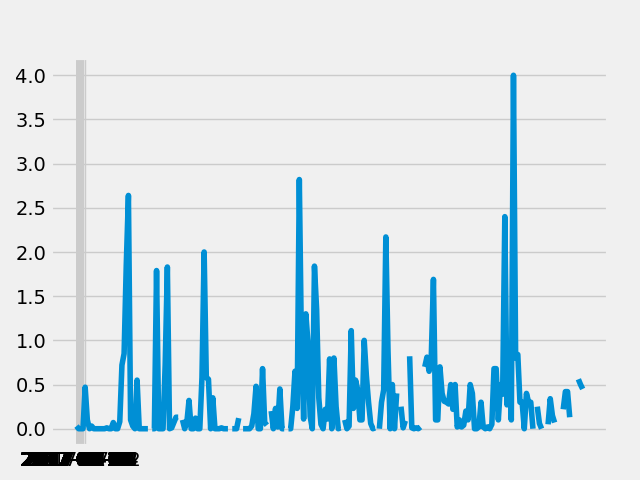

In [22]:
plt.xticks( prcp_df['Precipitation'], prcp_df.index.values )
plt.plot( prcp_df['Precipitation'] )
plt.show()

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
query_year = dt.date.today() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(*sel).\
    filter(func.strftime('%Y' '%m' '%d', Measurement.date) > query_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


![precipitation](Images/precipitation.png)

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,217.000000
mean,0.321889
std,0.553143
min,0.000000
25%,0.000000
50%,0.100000
75%,0.440000
max,4.000000


In [24]:
prcp_df.head()

,Precipitation
Date,
2017-01-01,0.03
2017-01-02,0.00
2017-01-03,0.00
2017-01-04,0.00
2017-01-05,0.47


In [41]:
# How many stations are available in this dataset?
sel = [Measurement.station]

stats = session.query(*sel).\
    group_by(Measurement.station).all()
len(stats)

9

In [42]:
# What are the most active stations?
# List the stations and the counts in descending order.
sel = [Measurement.station]

stat_cnt = session.query(*sel, func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all()
stat_cnt

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
activeStat = stat_cnt[0][0]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel = [Measurement.tobs]

minQ = session.query(*sel, func.min(Measurement.tobs)).\
    filter(Measurement.station == activeStat).all()
minTemp = minQ[0][0]

maxQ = session.query(*sel, func.max(Measurement.tobs)).\
    filter(Measurement.station == activeStat).all()
maxTemp = maxQ[0][0]

avgQ = session.query(*sel, func.avg(Measurement.tobs)).\
    filter(Measurement.station == activeStat).all()
avgTemp = avgQ[0][1]

print(f"Lowest Temp: {minTemp} | Highest Temp: {maxTemp} | Average Temp: {avgTemp}")

[(54.0, 85.0, 71.66378066378067)]

In [76]:
sel = [Measurement.tobs]
actQ = session.query(*sel).\
    filter(Measurement.station == activeStat).all()
actQ

[(70.0),
 (62.0),
 (74.0),
 (75.0),
 (74.0),
 (76.0),
 (69.0),
 (66.0),
 (70.0),
 (75.0),
 (64.0),
 (60.0),
 (61.0),
 (68.0),
 (64.0),
 (66.0),
 (67.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (60.0),
 (75.0),
 (75.0),
 (65.0),
 (75.0),
 (69.0),
 (67.0),
 (66.0),
 (69.0),
 (72.0),
 (67.0),
 (65.0),
 (64.0),
 (67.0),
 (67.0),
 (68.0),
 (69.0),
 (66.0),
 (69.0),
 (61.0),
 (71.0),
 (70.0),
 (70.0),
 (66.0),
 (71.0),
 (61.0),
 (68.0),
 (67.0),
 (62.0),
 (65.0),
 (69.0),
 (63.0),
 (62.0),
 (61.0),
 (64.0),
 (72.0),
 (68.0),
 (68.0),
 (68.0),
 (71.0),
 (69.0),
 (65.0),
 (67.0),
 (71.0),
 (70.0),
 (69.0),
 (69.0),
 (70.0),
 (69.0),
 (70.0),
 (73.0),
 (74.0),
 (67.0),
 (68.0),
 (64.0),
 (65.0),
 (68.0),
 (68.0),
 (72.0),
 (67.0),
 (64.0),
 (71.0),
 (70.0),
 (72.0),
 (73.0),
 (74.0),
 (69.0),
 (71.0),
 (72.0),
 (71.0),
 (74.0),
 (73.0),
 (71.0),
 (71.0),
 (69.0),
 (69.0),
 (72.0),
 (68.0),
 (75.0),
 (69.0),
 (65.0),
 (68.0),
 (65.0),
 (66.0),
 (64.0),
 (69.0),
 (69.0),
 (70.0),
 (69.0),
 (69.0),
 

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![station-histogram](Images/station-histogram.png)

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


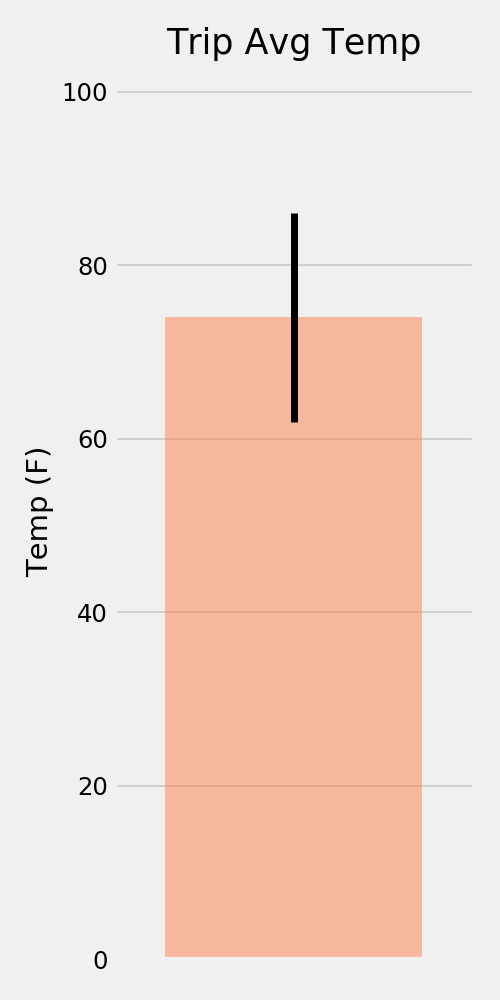

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


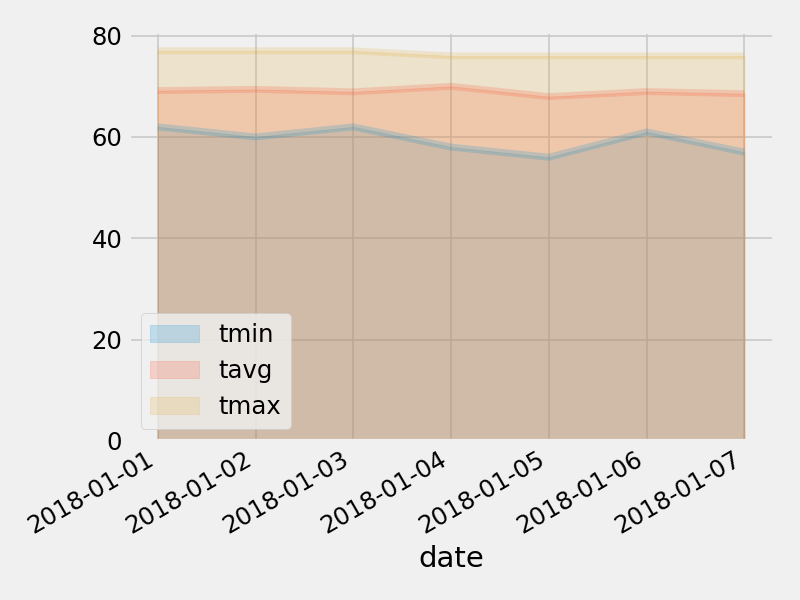

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
